In [20]:
import time
import collections
import random
import numpy as np
np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt

Population = np.zeros((10,20))
Population = Population.astype(int)
# Knapsack Specification
Max_Weight = 50;
# Value
V = [6,19,7,1,13,17,3,18,16,20,5,15,12,11,9,2,14,4,10,8]
# Weight
W = [10,5,15,18,1,17,12,19,16,4,9,20,13,7,3,2,6,11,8,14]


### Map weights and values to form PhenoTypes

PhenoType[Key][0] is the Weight


PhenoType[Key][1] is the Value

In [21]:
Geno_Pheno = collections.defaultdict(list)
i =0;
for i in range(0,len(W)):
    Geno_Pheno[i].append(W[i])
    Geno_Pheno[i].append(V[i])
    i+=1;  
    


### Randomize Population

In [22]:
def Randomize_Population(Population):
    for x in range(0,len(Population)):
        for y in range(0,len(Population[x])):
            Population[x][y] = random.randint(0,1)
Randomize_Population(Population)

### Spatial Mapping

In [23]:
Spatial_Individuals = np.zeros((1,len(Population))).astype(int)
for i in range(0,len(Population)):
    Spatial_Individuals[0][i] = i

### Get the Weight & Value of a locus

In [24]:
def Get_Geno (x):
    return (Geno_Pheno[x])

### Get the total weight and value of an individual

PARAM = An individual.


In [25]:
def Get_Fitness(Individual):
    total_Value = 0
    total_Weight = 0
    # Find the individual via index & get each Phenotype
    
    for i in range(0,20):
        # if the locus holds an item
        if Individual[i] == 1:
            # Get the PhenoType
            Pheno = Get_Geno(i)
            # Get the PhenoType Weight & Add to total
            total_Weight = total_Weight + Pheno[0]
            # Get the PhenoType Value & Add to total
            total_Value = total_Value + Pheno[1]

    return total_Weight,total_Value

print(Get_Geno(0))
print(Get_Geno(19))
x = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Get_Fitness(x)


[10, 6]
[14, 8]


(210, 210)

In [26]:
def Get_Best_Individual(Evolved_Population):
    
    i=0
    Highest_Weight,Highest_Value = Get_Fitness(Evolved_Population[i])
    Potential_Best = []
    Best_Individual = np.zeros((1,20)).astype(int)
    

    # Remove any overweight Individuals
    for i in range(0,len(Evolved_Population)):
        if Get_Fitness(Evolved_Population[i])[0] <= Max_Weight:
            Potential_Best.append(i)

    # if only one individual is under weight.
    if len(Potential_Best) == 1:
        return Evolved_Population[Potential_Best[0]]
    
    # if no individual is under weight.
    elif len(Potential_Best) == 0:
        Weight =200
        value = 1
        for i in range(0,len(Evolved_Population)):
            if Get_Fitness(Evolved_Population[i])[0] < Weight:
                Weight,Value = Get_Fitness(Evolved_Population[i])
                Best_Individual = Evolved_Population[i]
            if Get_Fitness(Evolved_Population[i])[0] == Weight:
                if Get_Fitness(Evolved_Population[i])[1] > Value:
                    Best_Individual = Evolved_Population[i]
        return Best_Individual
                    
                    
    # if multiple individuals are under weight               
    else:
        Highest_Value = 1
        for i in range(0,len(Potential_Best)):
            if Get_Fitness(Evolved_Population[Potential_Best[i]])[1] > Highest_Value:
                Highest_Value = Get_Fitness(Evolved_Population[Potential_Best[i]])[1] 
                Best_Individual = Evolved_Population[Potential_Best[i]]
        return Best_Individual
    

In [27]:
def Get_Worst_Individual(Evolved_Population):
    i=0

    
    Potential_Worst = []
    Worst_Individual = np.zeros((1,20))
    Worst_Individual = Worst_Individual.astype(int)
    # Add individuals over max weight to potential array.
    for i in range(0,len(Evolved_Population)):
        if Get_Fitness(Evolved_Population[i])[0]  > Max_Weight:
            Potential_Worst.append(i)
            
    # if only one individual is over max weight       
    if len(Potential_Worst) == 1:
        return Evolved_Population[Potential_Worst[0]]
    
    # if No individual is over the max weight, return the individual with the lowest weight
    elif len(Potential_Worst) == 0: 
        Lowest_Weight = 150
        for i in range(0,len(Evolved_Population)):
            if Get_Fitness(Evolved_Population[i])[1] < Lowest_Weight:
                Lowest_Weight = Get_Fitness(Evolved_Population[i])[1]
                Worst_Individual = Evolved_Population[i]
        return Worst_Individual
    
    # if Multiple individuals are over max weight - return the highest weight
    else:
        Highest_Weight = 1
        for i in range(0,len(Potential_Worst)):
            if Get_Fitness(Evolved_Population[Potential_Worst[i]])[0] > Highest_Weight:
                Highest_Weight = Get_Fitness(Evolved_Population[Potential_Worst[i]])[0]
                Worst_Individual = Evolved_Population[i]
        return Worst_Individual
            
 

In [28]:
def Get_Avg_Individual_No_Threshold(Evolved_Population):
    Avg_Individual = np.zeros((1,20))
    Avg_Individual = Avg_Individual.astype(int)
    for i in range(0,len(Evolved_Population)):
            # Sum up the values of each column from an Evolved Population 
            for x in range(0,20):
                if Evolved_Population[i][x] == 1:
                    Avg_Individual[0][x] = Avg_Individual[0][x] + 1  
    return Avg_Individual[0]
    # Apply a step function.               
    #for i in range(0,len(Avg_Individual[0])):
        # if more than half of the population have this gene
     #   if Avg_Individual[0][i] >= len(Evolved_Population)/2:
      #      Avg_Individual[0][i] = 1
      #  else:
     #      Avg_Individual[0][i] = 0
        
    

In [29]:
def Get_Avg_Individual_With_Threshold(Evolved_Population):
    i=0
    Avg_Individual = np.zeros((1,20))
    Avg_Individual = Avg_Individual.astype(int)
    for i in range(0,len(Evolved_Population)):
            # Sum up the values of each column from an Evolved Population 
            for x in range(0,20):
                if Evolved_Population[i][x] == 1:
                    Avg_Individual[0][x] = Avg_Individual[0][x] + 1  
    # Apply a step function.               
    for i in range(0,20):
        # if more than half of the population have this gene
        if Avg_Individual[0][i] >= len(Evolved_Population)/2:
            Avg_Individual[0][i] = 1
        else:
            Avg_Individual[0][i] = 0
        
    return Avg_Individual[0]

In [30]:
def Analyze_Individual_Similarity(x,y):
    Similarity = 0
    for i in range(0,len(x)):
        if x[i] == y[i]:
            Similarity = Similarity + 5      
    return Similarity
    

In [49]:
def Write_txt(File_Name,Mutation_Rates,Average_Weights,Average_Values,Average_Generations,Best_Individuals,
              Worst_Individuals,Avg_Individuals,Best_Weights,Best_Values,Worst_Weights,Worst_Values,
              Avg_Weights,Avg_Values,Pop_Size,Its,Sum_Of_Genes,Pcrossover):
    
    f= open(str(File_Name),"w")
    f.write('GA Variables:')
    f.write('\nMutation Rates:')
    f.write(str(Mutation_Rates))
    f.write('\nPopulation Size:')
    f.write(str(Pop_Size))
    f.write('\nIterations:')
    f.write(str(Its))
    f.write('\nCrossover Probability:')
    f.write(str(Pcrossover))
               
            
            
            
            
    f.write('\n\n RESULTS: \n\n')
    
    f.write('\n\n Average Weights\n')
    f.write(str(Average_Weights))
    f.write('\n\n Average Values\n')
    f.write(str(Average_Values)) 
    f.write('\n\n Average Generations\n')
    f.write(str(Average_Generations)) 
    f.write('\n\n Best Individuals Produced\n')
    f.write(str(Best_Individuals))
    f.write('\n\n Worst Individuals Produced\n')
    f.write(str(Worst_Individuals))
    f.write('\n\n Average Individuals Produced\n')
    f.write(str(Avg_Individuals))
    f.write('\n\n Average Individual Weights\n')
    f.write(str(Avg_Weights))
    f.write('\n\n Average Individual Values\n')
    f.write(str(Avg_Values))
    f.write('\n\n Best Individual Weights\n')
    f.write(str(Best_Weights))
    f.write('\n\n Best Individual Values\n')
    f.write(str(Best_Values))
    f.write('\n\n Worst Individual Weights\n')
    f.write(str(Worst_Weights))
    f.write('\n\n Worst Individual Values\n')
    f.write(str(Worst_Values))
    f.write('\n\n Sum of specific genes given to individuals\n')
    f.write(str(Sum_Of_Genes))
    
    

### Tournement Selection

Selects two individuals at random.

In [50]:
#def Tournement_Selection(Population,Mutation_Rate):
 #   x = random.randint(0,len(Population) -1)
  #  y = random.randint(0,len(Population) -1)
    # pass the individuals to the tournemnt
   # Tournement(Mutation_Rate,Population[x],Population[y])  
    
def Tournement_Selection(Population,Mutation_Rate,Spatial_Individuals,Pcrossover):
    x = random.randint(0,len(Spatial_Individuals[0])-1)
    # Select another individual from local area
    y = random.randint(x-2,x+2)
    if y < 0:
        if y == -1:
            y = len(Spatial_Individuals[0]) -1
        elif y == -2:
            y = len(Spatial_Individuals[0]) -2

    elif y > len(Spatial_Individuals[0])-1:
        if y == len(Spatial_Individuals[0]):
            y = 0
        elif y == len(Spatial_Individuals[0])+1:
            y = 1
    # pass the individuals to the tournemnt
    Tournement(Mutation_Rate,Population[x],Population[y],Pcrossover)  
    
    

### Evolve

In [51]:
def Evolve(Population,Mutation_Rate,Spatial_Individuals,Pcrossover):
    x=0;
    while not(Full_Convergence(Population)):   
        x = x+1;
        for i in range(0,len(Population)):   
            Tournement_Selection(Population,Mutation_Rate,Spatial_Individuals,Pcrossover)
    return x

### Tournement

Evaluate fitness of the two individuals.
Pass winner and loser to the crossover function.

In [52]:
def Tournement(Mutation_Rate,x,y,Pcrossover):
    Winner,Winner_Vals,Loser,Loser_Vals = Evaluate_Fitness(x,y)
    CrossOver(Mutation_Rate,Winner,Loser,Pcrossover)

### Evaluate Fitness

In [53]:
def Evaluate_Fitness (x,y):
    x_ = Get_Fitness(x)
    y_ = Get_Fitness(y)

    # pick the individual Not over max weight.
    if y_[0] <= Max_Weight and x_[0] > Max_Weight:
      #  print('Y under and x over max weight')
        return y,y_,x,x_
    if x_[0] <= Max_Weight and y_[0] > Max_Weight:
      #  print('x under and y over max weight',x_,y_)
        return x,x_,y,y_  
    
    # if both are over max weight
    if x_[0] > Max_Weight and y_[0] > Max_Weight:
      #  print('both over',x_,y_)
        if x_[0] < y_[0]:
         #   print('both over and x lower weight ',x_,y_)
            return x,x_,y,y_
        else:
         #   print('both over and y lower weight ',x_,y_)
            return y,y_,x,x_
        
    # if both are under max weight
    if x_[0] <= Max_Weight and y_[0] <= Max_Weight:
      #  print('both under',x_,y_)
        if x_[1] > y_[1]:
          #  print('both under and x higher value ',x_,y_)
            return x,x_,y,y_
        if y_[1] > x_[1]:
         #   print('both under and y higher value ',x_,y_)
            return y,y_,x,x_
        if x_[1] == y_[1]:
         #   print('both under and equal value ',x_,y_)
            if x_[0] < y_[0]:
           #     print('Both under with equal value and x has lower weight')
                return x,x_,y,y_
            else:
           #     print('Both under with equal value and y has lower weight')
                return y,y_,x,x_
            
    else:
        print('OTHER_______',x,x_,y,y_)
    
   

### CrossOver Function

Initial: NO CROSSOVER POINT.
        The Winner is Copied onto the loser using a single point crosser, position determined by a randomly generated number.
        
Additional:
            The offspring will be produced from a MULTIPLE POINT CROSSOVER
            The tournement will a two tier tournemnt, where winners of a round are awarded one reproduction point, up to a maximum of two. each individual may take part in 2 rounds, but also may take part in none. the individuals are then selected to be parent according to their reproduction poiunts.

In [54]:
def CrossOver(Mutation_Rate,Winner,Loser,Pcrossover):
    #print('Winner before:',Winner)
   # print('Loser before:',Loser)
    # Copy over the winners values into the loser.
    for i in range(0,len(Loser)):
        x = random.randint(0,1)
        if x >= Pcrossover:
            Loser[i] = Winner[i]
   # print('Winner:',Winner)
    #print('Loser',Loser)
    Mutate(Mutation_Rate,Loser) 

### Mutation Function

Mutation consists of flipping the bit at a randomly
chosen locus (or, for larger alphabets, replacing a the symbol at a randomly chosen locus with a randomly
chosen new symbol).

Initial:
        Flip bits- if index exceeds length than wrap around.
        
Adittional:
           Replace bits.
           
Additional 2:
           If the max weight is exceeded then increase the mutation rate. = More varience. Will this solve the problem faster?

In [55]:
def Mutate (Mutation_Rate,OffSpring):
   # print('OffSpring before:',OffSpring)
    for i in range(0,len(OffSpring)):
        y = random.uniform(0,1)
        # If the random number is above the mutation threshold then mutation occurs
        if y > Mutation_Rate:
            # Random int decided which direction the swap will occur.
          #  print('Offspring(i)=:',OffSpring[i])
            if OffSpring[i] == 1:
             #   print('Before Assignment:',OffSpring[i])
                OffSpring[i] = 0
               # print('After assignment:',OffSpring[i])
            else: OffSpring[i] = 1
           # print('Offspring After:',OffSpring)
            return OffSpring
                


### Full Convergence

Loops through the populations; returns true if they are all identical.

In [56]:
def Full_Convergence(Population):
    for i in range(0,len(Population)):
        if not(Population[0] == Population[i]).all():
            return False
    return True

### Testing Function

Automate the testing procedure.

Parameters :  ALL SINGLE VALUE.

             Mutation Rate: Can be a set or single
             
             Population Size:
             
             Num_Populations: How many different populations to run the GA 

Individuals produced contains the provided optimal solution from each iteration of the GA.
End result will be a matrix of Iterationsx20 size. 
 So it returns a ful matrix; each row is the result of a full iteration of the ga.



In [57]:
def Analysis(Mutation_Rate,Population_Size,Num_Populations,Pcrossover):

    Avg_Convergence =0
    Avg_Weight = 0;
    Avg_Value = 0;
    
    # Store each optimal solution from a population
    Individuals_Produced = np.zeros((Num_Populations,20))
    Individuals_Produced = Individuals_Produced.astype(int)
    

    for i in range(0,Num_Populations):
        
        Population = np.zeros((Population_Size,20))
        Population = Population.astype(int)
        Randomize_Population(Population)
        Spatial_Individuals = np.zeros((1,len(Population))).astype(int)
        for x in range(0,len(Population)):
            Spatial_Individuals[0][x] = x
        

        Fully_Converged = Evolve(Population,Mutation_Rate,Spatial_Individuals,Pcrossover)
        Avg_Convergence = Avg_Convergence + Fully_Converged
        x = Get_Fitness(Population[0])
        Avg_Weight = Avg_Weight + x[0]
        Avg_Value = Avg_Value + x[1]
        
        # Once the population is fully converged, store the solution into Individuals_Produced
        Individuals_Produced[i] = Population[0]
        #print(Individuals_Produced)
    # Individuals_ Produced contains the solution provided for each iteration of the GA. results in a iterationsx20 matrix
    return Avg_Convergence/Num_Populations,Avg_Weight/Num_Populations,Avg_Value/Num_Populations,Individuals_Produced
    

### Comparison Function

Executes the analysis function to get average statistics from GA execution. Saves results to a specified file name.

PARAMS:

        File name: function creates a new text file; what should it be called
        
        Mutation rate: Can be a set or single.
        
        Population_Size:
        
        Iterations:
        
Passes only single vallues to the analysis function



Compare function:

                Gets the average Convergence,Weight,Values and the individuals produced -  returned as a matrix from analysis function

In [58]:
def Compare(File_Name,Mutation_Rate,Population_Size,Iterations,Pcrossover):
    
    Avg_Weights = np.zeros((len(Mutation_Rate),len(Pcrossover)))
    Avg_Weights = Avg_Weights.astype(int)
    Avg_Values = np.zeros((len(Mutation_Rate),len(Pcrossover)))
    Avg_Values = Avg_Values.astype(int)
    Avg_Generations = np.zeros((len(Mutation_Rate),len(Pcrossover)))
    Avg_Generations = Avg_Generations.astype(int)
    
    Worst_Individual_Weights = np.zeros((len(Mutation_Rate),len(Pcrossover)))
    Worst_Individual_Weights = Worst_Individual_Weights.astype(int)
    Worst_Individual_Values = np.zeros((len(Mutation_Rate),len(Pcrossover)))
    Worst_Individual_Values = Worst_Individual_Values.astype(int)
    
    Best_Individual_Weights = np.zeros((len(Mutation_Rate),len(Pcrossover)))
    Best_Individual_Weights = Best_Individual_Weights.astype(int) 
    Best_Individual_Values = np.zeros((len(Mutation_Rate),len(Pcrossover)))
    Best_Individual_Values = Best_Individual_Values.astype(int)
    
    
    Bbest_Individual_Weights = np.zeros((len(Mutation_Rate),len(Pcrossover)))
    Bbest_Individual_Weights = Bbest_Individual_Weights.astype(int)
    Bbest_Individual_Values = np.zeros((len(Mutation_Rate),len(Pcrossover)))
    Bbest_Individual_Values = Bbest_Individual_Values.astype(int)
    
    Average_Individual_Weights = np.zeros((len(Mutation_Rate),len(Pcrossover)))
    Average_Individual_Weights = Average_Individual_Weights.astype(int)
    Average_Individual_Values = np.zeros((len(Mutation_Rate),len(Pcrossover)))
    Average_Individual_Values = Average_Individual_Values.astype(int)
    
    
    
    Best_Individuals_Produced = np.zeros((len(Mutation_Rate)*len(Pcrossover),20)).astype(int)

    
    Avg_Individuals_Produced = np.zeros((len(Mutation_Rate)*len(Pcrossover),20)).astype(int)

    
    Sum_Genes_Of_Individuals_Produced = np.zeros((len(Mutation_Rate)*len(Pcrossover),20)).astype(int)
    
    
    Worst_Individuals_Produced = np.zeros((len(Mutation_Rate)*len(Pcrossover),20)).astype(int)

    
    Avg_Worst_Individuals_Produced = np.zeros((len(Mutation_Rate)*len(Pcrossover),20)).astype(int)
  
    
    Avg_Best_Individuals_Produced = np.zeros((len(Mutation_Rate)*len(Pcrossover),20)).astype(int)

    
    # Here i need to get: Average weights,values,generations, similarity. Best,worst and average individual.  
    
    y=-1
    # For each population size 
    for i in range(0,len(Mutation_Rate)):
        # Loop the entire mutation rate vector
        for x in range(0,len(Pcrossover)):
            y = y+1
          
            Avg_Convergence,Avg_Weight,Avg_Value,Individuals = Analysis(Mutation_Rate[i],Population_Size,Iterations,Pcrossover[x])
            # Average weight
            Avg_Weights[i][x] = Avg_Weight
             # Average value.
            Avg_Values[i][x] = Avg_Value
            # Average generations for full convergence.
            Avg_Generations[i][x] = Avg_Convergence


             # Best,worst and average individuals produced can be obtained form the individuals variable
            Best_Individual = Get_Best_Individual(Individuals) 
            Avg_Individual = Get_Avg_Individual_With_Threshold(Individuals)
            Sum_Of_Genes = Get_Avg_Individual_No_Threshold(Individuals)

            Worst_Individual = Get_Worst_Individual(Individuals)

            # Store the best,worst and average individuals produced into matricies
            Best_Individuals_Produced[y] = Best_Individual
            Avg_Individuals_Produced[y]  = Avg_Individual
            Worst_Individuals_Produced[y] = Worst_Individual
            Sum_Genes_Of_Individuals_Produced[y] = Sum_Of_Genes

            # Store the best,worst and average individuals Weight,value's produced into matricies
            Best_Individual_Weights[i][x],Best_Individual_Values[i][x] = Get_Fitness(Best_Individual)
            Worst_Individual_Weights[i][x],Worst_Individual_Values[i][x] = Get_Fitness(Worst_Individual)
            Average_Individual_Weights[i][x],Average_Individual_Values[i][x] = Get_Fitness(Avg_Individual) 
            print('population size',Mutation_Rate[i],'Crossover Probability',Pcrossover[x],'complete')
            
            
            
    Write_txt(File_Name,Mutation_Rate,Avg_Weights,Avg_Values,Avg_Generations,
    Best_Individuals_Produced,Worst_Individuals_Produced,Avg_Individuals_Produced,
    Best_Individual_Weights,Best_Individual_Values,Worst_Individual_Weights,Worst_Individual_Values,
    Average_Individual_Weights,Average_Individual_Values,Population_Size,Iterations,Sum_Genes_Of_Individuals_Produced,Pcrossover)
    

Compare('Microbial_GA_Mutation_CHANGE_POP10',[0.98, 0.985, 0.99, 0.995, 1],1,2,[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])


population size 0.98 Crossover Probability 0.1 complete
population size 0.98 Crossover Probability 0.2 complete
population size 0.98 Crossover Probability 0.3 complete
population size 0.98 Crossover Probability 0.4 complete
population size 0.98 Crossover Probability 0.5 complete
population size 0.98 Crossover Probability 0.6 complete
population size 0.98 Crossover Probability 0.7 complete
population size 0.98 Crossover Probability 0.8 complete
population size 0.98 Crossover Probability 0.9 complete
population size 0.98 Crossover Probability 1 complete
population size 0.985 Crossover Probability 0.1 complete
population size 0.985 Crossover Probability 0.2 complete
population size 0.985 Crossover Probability 0.3 complete
population size 0.985 Crossover Probability 0.4 complete
population size 0.985 Crossover Probability 0.5 complete
population size 0.985 Crossover Probability 0.6 complete
population size 0.985 Crossover Probability 0.7 complete
population size 0.985 Crossover Probability

In [68]:
    
x = Avg_Convergence,Avg_Weight,Avg_Value,Individual = Analysis(0.95,10,10,0.1)
y = Avg_Convergence,Avg_Weight,Avg_Value,Individual = Analysis(1,10,10,0.1)

print('x"s Number of generations for full convergence:',x[0])
print('Average weight of the individuals:',x[1])
print('Average Value of the inddividuals:',x[2])

print('y"s Number of generations for full convergence:',y[0])
print('Average weight of the individuals:',y[1])
print('Average Value of the inddividuals:',y[2])



print('\n\n')
# Gets the Best individual from an evolved population
Best_x = Get_Best_Individual(x[3])
Best_y = Get_Best_Individual(y[3])
print('Best individual from x fitness:',Get_Fitness(Best_x))
print('Best Individual From y fitness:',Get_Fitness(Best_y))
print('Best Individual From x fitness:',Best_x)
print('Best Individual From y fitness:',Best_y)
print('Similarity between two two best individuals:',Analyze_Individual_Similarity(Best_x,Best_y))


print('\n\n\n\n')
# Gets the Avg individual from an evolved population
Avg_x = Get_Avg_Individual(x[3])
Avg_y = Get_Avg_Individual(y[3])
print('Avg individual from x fitness:',Get_Fitness(Avg_x[0]))
print('Avg Individual From y fitness:',Get_Fitness(Avg_y[0]))
print('Avg Individual From x fitness:',Avg_x)
print('Avg Individual From y fitness:',Avg_y)
print('Similarity between two two Avg individuals:',Analyze_Individual_Similarity(Avg_x[0],Avg_y[0]))

KeyboardInterrupt: 

Old comparison function.

In [61]:
Average_Weights =[0,0,0,0,0,0,0,0,0]
Average_Values =[0,0,0,0,0,0,0,0,0]
Average_Generations =[0,0,0,0,0,0,0,0,0]
Mutation_Rates = [0.960,0.965,0.970,0.975,0.980,0.985,0.990,0.995,1.0]
#print(len(Averages))
#print(len(Mutation_Rates))
Before = time.time()
def AVG():
    for i in range(0,len(Mutation_Rates)):
        Avg_Convergence,Avg_Weight,Avg_Value,Individual = Analysis(Mutation_Rates[i],10,10)
        Average_Weights[i] = Avg_Weight
        Average_Values[i] = Avg_Value
        Average_Generations[i] = Avg_Convergence
    f= open("AIAB_Steady_State_Output_Averages_Changed_Mutation_Rates.txt","w")
    f.write('Mutation Rates:')
    f.write(str(Mutation_Rates))
    f.write('\n Average Weights')
    f.write(str(Average_Weights))
    f.write('\n Average Values')
    f.write(str(Average_Values)) 
    f.write('\n Average Generations')
    f.write(str(Average_Generations)) 
    print(Average_Weights)
    print(Average_Values)
    print(Average_Generations)


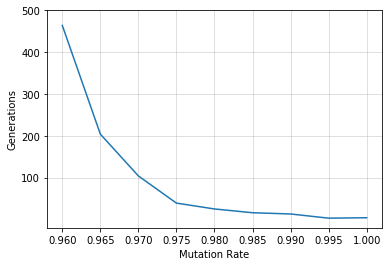

In [62]:


Gens = [464, 204, 104,  39,  25,  16,  13,   3,   4]

Mut = [0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 1.0]

plt.plot(Mut,Gens)
plt.ylabel('Generations')
plt.xlabel('Mutation Rate')
plt.yticks([100,200,300,400,500])
plt.grid(which='both')
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)
plt.show()




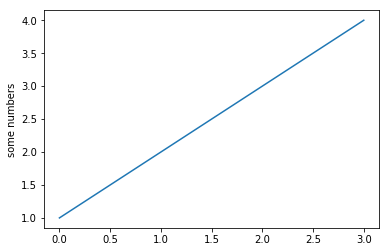

In [63]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()


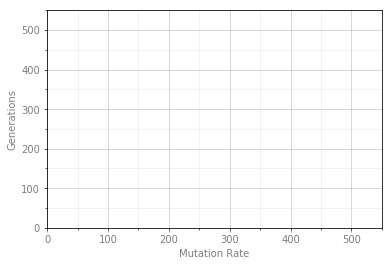

In [64]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

major_ticks = np.arange(0,600,100)
minor_ticks = np.arange(0, 600, 50)
ax.set_xlabel("Mutation Rate", color="C7")
ax.set_ylabel("Generations", color="C7")
ax.tick_params(axis='x', colors="C7")
ax.tick_params(axis='y', colors="C7")
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()

Use this for presenting reulst from all three GA'S in the report. 

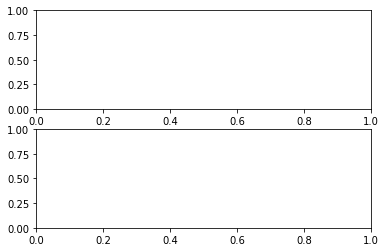

In [65]:
fig = plt.figure()
fig.add_subplot(211)   #top left
fig.add_subplot(212)   #top right
   #bottom left

plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


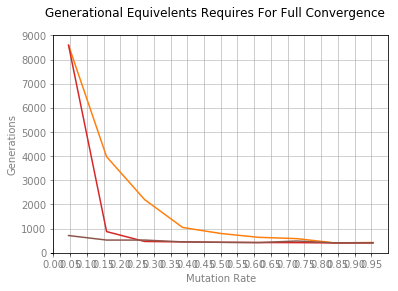

In [66]:
SS_Mut=[0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 1.0]
SS_Gens=[264, 104, 104,  39,  25,  16,  70,   3,   4]

SP_Mut=[0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 1.0]
SP_Gens=[464, 204, 104,  39,  25,  16,  13,   3,   4]

MI_Mut=[0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 1.0]
MI_Gens=[7004, 404, 54,  39,  25,  16,  13,   3,   4]


fig=plt.figure()

fig.suptitle('Generational Equivelents Requires For Full Convergence')

ax=fig.add_subplot(111, label="1",frame_on=True)
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax3=fig.add_subplot(111, label="3", frame_on=False)
ax4=fig.add_subplot(111, label="3", frame_on=False)


ax2.plot(SP_Mut, SP_Gens, color="C1")
ax3.plot(MI_Mut, MI_Gens, color="C3")
ax4.plot(SS_Mut, SS_Gens, color="C5")

ax.set_xlabel("Mutation Rate", color="C7")
ax.set_ylabel("Generations", color="C7")
ax.tick_params(axis='x', colors="C7")
ax.tick_params(axis='y', colors="C7")


ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax4.xaxis.set_visible(False)
ax4.yaxis.set_visible(False)

major_ticks = np.arange(0,10000,1000)
minor_ticks = np.arange(0, 0.96, 0.05)
ax.set_xlabel("Mutation Rate", color="C7")
ax.set_ylabel("Generations", color="C7")
ax.tick_params(axis='x', colors="C7")
ax.tick_params(axis='y', colors="C7")
ax.set_xticks(minor_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.7)


plt.show()

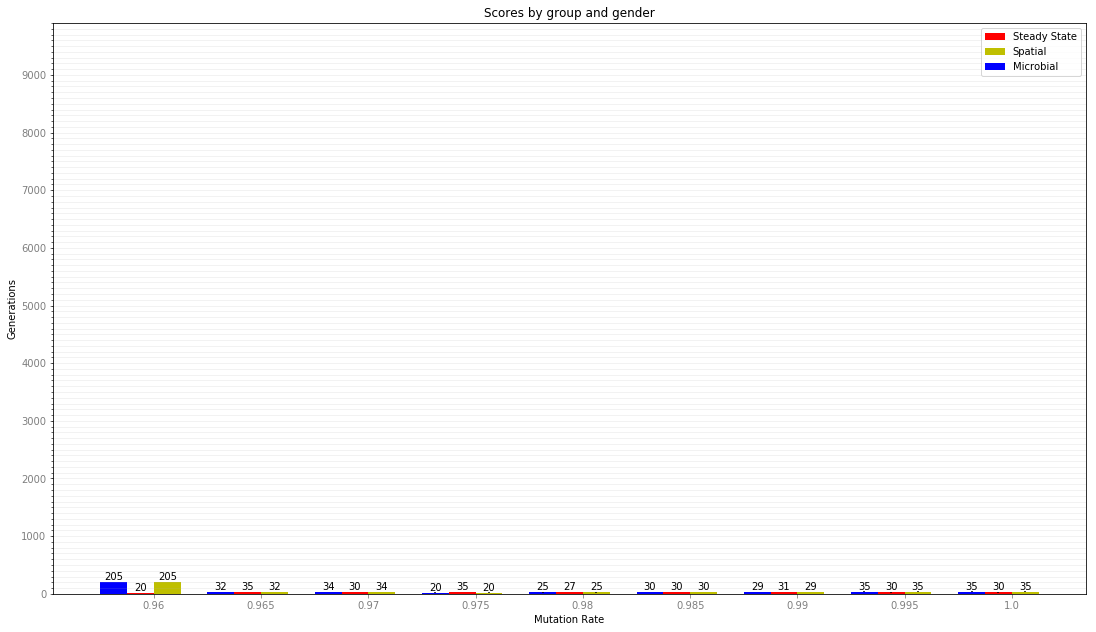

In [67]:
N = 9

SS_Mut=(0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 1.0)
SS_Gens=(264, 104, 104,  39,  25,  16,  70,   3,   4)


#Set axis values
major_ticks = np.arange(0,10000,1000)
minor_ticks = np.arange(0,10000,100)
men_means = (20, 35, 30, 35, 27, 30, 31, 30, 30)
men_std = (2, 3, 4, 1, 2, 5 ,6, 8, 9)

ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

women_means = (205, 32, 34, 20, 25, 30, 29, 35, 35)
women_std = (3, 5, 2, 3, 3, 4, 5, 8, 9)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)
rects3 = ax.bar(ind - width, women_means, width, color='b', yerr=women_std)



# add some text for labels, title and axes ticks
ax.set_ylabel('Generations')
ax.set_xlabel('Mutation Rate')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 1.0))
ax.set_yticklabels((major_ticks))
ax.legend((rects1[0], rects2[0], rects3[0]), ('Steady State', 'Spatial','Microbial'))


# set axis spacing,color
ax.tick_params(axis='x', colors="C7")
ax.tick_params(axis='y', colors="C7")
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=1.9)




def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
ax.grid()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()
